In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister,ClassicalRegister, Parameter, ParameterVector
from qiskit import transpile
from qiskit.quantum_info import Operator,process_fidelity, DensityMatrix, partial_trace

import numpy as np

In [2]:
from circuit_struct import VCircuitConstructor
from evaluate import fid_circuit, Evaluator

In [3]:
vqc = VCircuitConstructor.get_vqc(3)

In [4]:
target_para = np.random.rand(6)
target_qc = vqc['circuit'].assign_parameters(target_para)

In [5]:
evaluator = Evaluator('para',target=target_qc,vqc=vqc['circuit'])

In [6]:
test_para = np.random.rand(6)
evaluator.evaluate(test_para)

0.7984145026595659

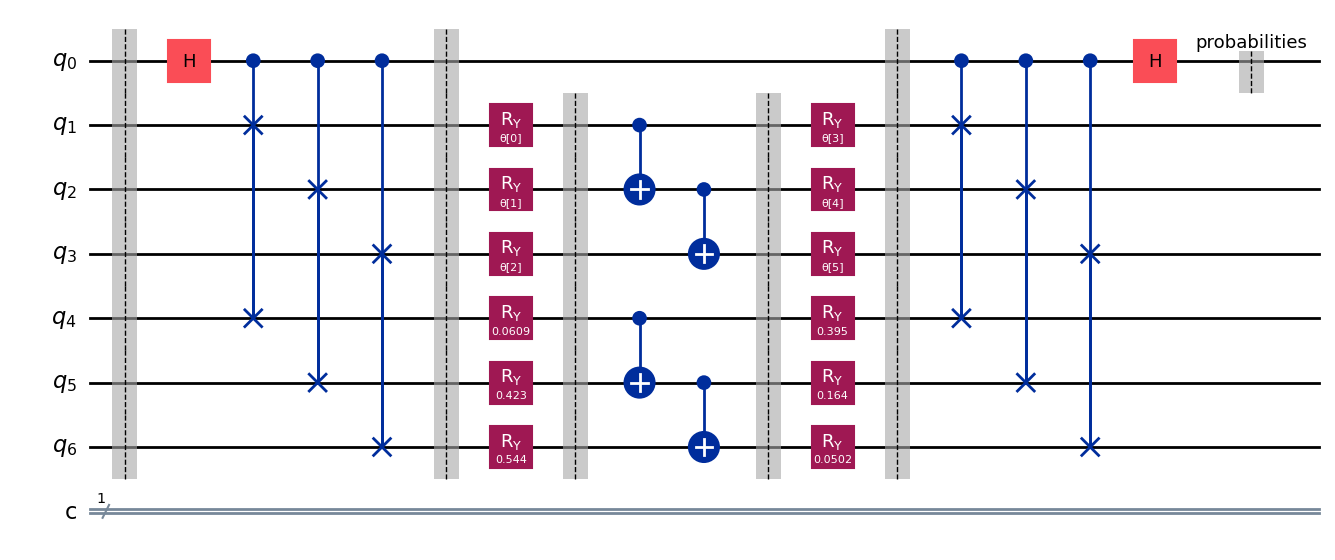

In [7]:
final_circ = fid_circuit(vqc['circuit'],target_qc)
final_circ.draw("mpl",style={'name':'iqp'})

In [8]:
assigning = lambda para: {p: v for p, v in zip(vqc['para'], para)}

from qiskit_aer import AerSimulator
simulator = AerSimulator(method='density_matrix')

trial_qc = transpile(final_circ, simulator)